<a href="https://colab.research.google.com/github/olusipedaniel/zero-to-mastery-exercises/blob/main/05_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Use feature-extraction to train a transfer learning model on 10% of the Food Vision data for 10 epochs using tf.keras.applications.EfficientNetB0 as the base model. Use the ModelCheckpoint callback to save the weights to file.
2. Fine-tune the last 20 layers of the base model you trained in 2 for another 10 epochs. How did it go?
3. Fine-tune the last 30 layers of the base model you trained in 2 for another 10 epochs. How did it go?
4.Write a function to visualize an image from any dataset (train or test file) and any class (e.g. "steak", "pizza"... etc), visualize it and make a prediction on it using a trained model.

### 1. Use feature-extraction to train a transfer learning model on 10% of the Food Vision data for 10 epochs using tf.keras.applications.EfficientNetB0 as the base model. Use the ModelCheckpoint callback to save the weights to file.

In [1]:
# Importing tensorflow
import tensorflow as tf
tf.__version__

'2.8.2'

In [2]:
# Getting data (10% of Food101 dataset)
import zipfile

# Downloading data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzipping data
zip_ref=zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2022-07-10 19:08:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 172.217.218.128, 142.251.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  93.9MB/s    in 1.7s    

2022-07-10 19:09:01 (93.9 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
import os

# Walk through the 10_food_class_10_percent directory and list the number of files
for dirpath,dirnames,filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directory and {len(filenames)} images in {dirpath}.")

There are 2 directory and 0 images in 10_food_classes_10_percent.
There are 10 directory and 0 images in 10_food_classes_10_percent/test.
There are 0 directory and 250 images in 10_food_classes_10_percent/test/sushi.
There are 0 directory and 250 images in 10_food_classes_10_percent/test/chicken_curry.
There are 0 directory and 250 images in 10_food_classes_10_percent/test/chicken_wings.
There are 0 directory and 250 images in 10_food_classes_10_percent/test/grilled_salmon.
There are 0 directory and 250 images in 10_food_classes_10_percent/test/ramen.
There are 0 directory and 250 images in 10_food_classes_10_percent/test/fried_rice.
There are 0 directory and 250 images in 10_food_classes_10_percent/test/ice_cream.
There are 0 directory and 250 images in 10_food_classes_10_percent/test/hamburger.
There are 0 directory and 250 images in 10_food_classes_10_percent/test/steak.
There are 0 directory and 250 images in 10_food_classes_10_percent/test/pizza.
There are 10 directory and 0 image

In [4]:
# Setting up paths to the data directory
train_dir="10_food_classes_10_percent/train"
test_dir="10_food_classes_10_percent/test"

In [5]:
# Loading images into batches using image datset from directory
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Defining image size and batch size
IMG_SIZE=(224,224)
BTH_SIZE=32

# Importting data from directory and spliting the imto batches 
train_data=image_dataset_from_directory(directory=train_dir,
                                        label_mode="categorical",
                                        image_size=IMG_SIZE,
                                        batch_size=BTH_SIZE,
                                        seed=42)

test_data=image_dataset_from_directory(directory=test_dir,
                                       label_mode="categorical",
                                       image_size=IMG_SIZE,
                                       batch_size=BTH_SIZE,
                                       seed=42)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [6]:
# Getting class_names
class_names=train_data.class_names
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [7]:
# Importing ModelCheckpoint callback
from tensorflow.keras.callbacks import ModelCheckpoint

# Creating filepath
filepath="ten_percent_model_checkpoints_weights/"

# Creating ModelCheckpoint callback that saves model's weights only
checkpoint_callback=ModelCheckpoint(filepath=filepath,
                                    save_weights_only=True,
                                    save_freq="epoch",
                                    verbose=1)

In [8]:
# Creating base model and freezing the base model layers
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

# Creating the input layers
input=tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

# Passing  input layer into base_model
x=base_model(input)

# Pooling output features of the base model
x=tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Creating output activation layer
output=tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)

# Creating a model using inputs and outputs
model=tf.keras.Model(inputs=input,
                     outputs=output)

# Compiling model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

initial_epoch=10
# Fitting the model
history=model.fit(train_data,
                  epochs=initial_epoch,
                  steps_per_epoch=len(train_data),
                  validation_data=test_data,
                  validation_steps=len(test_data),
                  callbacks=[checkpoint_callback])

16719872/16705208 [==============================] - 1s 0us/step
Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 1.8996 - accuracy: 0.3787
Epoch 1: saving model to ten_percent_model_checkpoints_weights/
24/24 [==============================] - 113s 5s/step - loss: 1.8996 - accuracy: 0.3787 - val_loss: 1.3598 - val_accuracy: 0.6788
Epoch 2/10
24/24 [==============================] - ETA: 0s - loss: 1.1499 - accuracy: 0.7333
Epoch 2: saving model to ten_percent_model_checkpoints_weights/
24/24 [==============================] - 105s 5s/step - loss: 1.1499 - accuracy: 0.7333 - val_loss: 0.9459 - val_accuracy: 0.7788
Epoch 3/10
24/24 [==============================] - ETA: 0s - loss: 0.8415 - accuracy: 0.8053
Epoch 3: saving model to ten_percent_model_checkpoints_weights/
24/24 [==============================] - 106s 5s/step - loss: 0.8415 - accuracy: 0.8053 - val_loss: 0.7648 - val_accuracy: 0.8100
Epoch 4/10
24/24 [==============================] - ETA: 0s - loss: 0.6

In [9]:
# Checking model layer
for num,layer in enumerate(model.layers):
  print(num,layer.name, layer.trainable)

0 input_layer True
1 efficientnetb0 False
2 global_average_pooling_layer True
3 output_layer True


In [10]:
# Evaluating model
model.evaluate(test_data)

79/79 [==============================] - 79s 992ms/step - loss: 0.4993 - accuracy: 0.8500


[0.4993399381637573, 0.8500000238418579]

In [11]:
# Importing matplotlib
import matplotlib.pyplot as plt

# Creating a function to plot loss curves
def plot_loss_curves(history):

  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  epochs=range(len(history.history["loss"]))

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  # Plotting loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("Loss curves")
  plt.xlabel("epoch")
  plt.legend();

  # Plotting accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("Accuracy curves")
  plt.xlabel("Epochs")
  plt.legend();

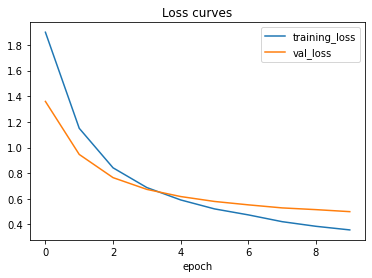

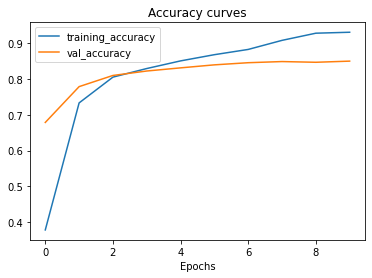

In [12]:
# Plotting model loss curves
plot_loss_curves(history)

### 2. Fine-tune the last 20 layers of the base model you trained in 2 for another 10 epochs. How did it go?

In [13]:
# Fine tuning the model, setting base_model.trainable to True
base_model.trainable=True

# Freezing all the layers except for the last 20 layers
for layer in base_model.layers[:-20]:
  layer.trainable=False

In [14]:
# Checking model layers
for num,layer in enumerate(model.layers):
  print(num,layer.name,layer.trainable)

0 input_layer True
1 efficientnetb0 True
2 global_average_pooling_layer True
3 output_layer True


In [15]:
# Checking base_model layers
for num,layer in enumerate(base_model.layers):
  print(num,layer.name,layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [16]:
# Re-compiling model for fine-tuning
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # learning rate is 10x lower than before for fine-tuning
              metrics="accuracy")

In [17]:
# Fitting the model for fine-tuning

fine_tune_epochs=initial_epoch+10
history_fine_tune_model_20=model.fit(train_data,
                                     epochs=fine_tune_epochs,
                                     steps_per_epoch=len(train_data),
                                     validation_data=test_data,
                                     validation_steps=int(0.25*len(test_data)),
                                     initial_epoch=history.epoch[-1])

Epoch 10/20
24/24 [==============================] - 57s 2s/step - loss: 0.7869 - accuracy: 0.8213 - val_loss: 0.4529 - val_accuracy: 0.8618
Epoch 11/20
24/24 [==============================] - 48s 2s/step - loss: 0.5109 - accuracy: 0.9040 - val_loss: 0.4547 - val_accuracy: 0.8553
Epoch 12/20
24/24 [==============================] - 50s 2s/step - loss: 0.3902 - accuracy: 0.9293 - val_loss: 0.4190 - val_accuracy: 0.8734
Epoch 13/20
24/24 [==============================] - 50s 2s/step - loss: 0.3026 - accuracy: 0.9547 - val_loss: 0.4282 - val_accuracy: 0.8602
Epoch 14/20
24/24 [==============================] - 50s 2s/step - loss: 0.2438 - accuracy: 0.9693 - val_loss: 0.4155 - val_accuracy: 0.8635
Epoch 15/20
24/24 [==============================] - 48s 2s/step - loss: 0.2129 - accuracy: 0.9760 - val_loss: 0.3982 - val_accuracy: 0.8684
Epoch 16/20
24/24 [==============================] - 48s 2s/step - loss: 0.1789 - accuracy: 0.9853 - val_loss: 0.3973 - val_accuracy: 0.8684
Epoch 17/20
2

In [18]:
# Evaluating model
result_fine_tune_model_20=model.evaluate(test_data)
result_fine_tune_model_20

79/79 [==============================] - 85s 1s/step - loss: 0.4125 - accuracy: 0.8568


[0.41253915429115295, 0.8568000197410583]

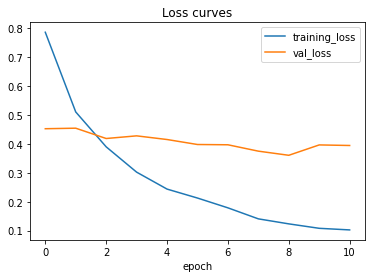

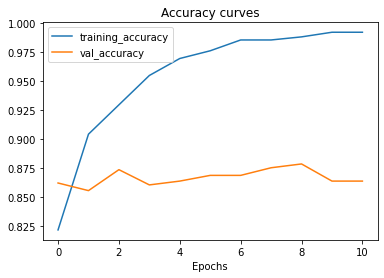

In [19]:
# Ploting loss curves
plot_loss_curves(history_fine_tune_model_20)

After fine-tuning the last 20 layers of the model and training for extra 10 epochs, the model improved slightly now trying to fine-tuning the last 30 layers 

### 3. Fine-tune the last 30 layers of the base model you trained in 2 for another 10 epochs. How did it go?

In [20]:
# Loading the weights we've saved earlier 
model.load_weights("ten_percent_model_checkpoints_weights/")

In [21]:
# Checking the model layers
for num,layer in enumerate(model.layers):
  print(num,layer.name,layer.trainable)

0 input_layer True
1 efficientnetb0 True
2 global_average_pooling_layer True
3 output_layer True


In [22]:
# Fine-tuning the model, setting base_model.trainable to True
base_model.trainable=True

# Freezing all the layers except for the last 30 layers
for layer in base_model.layers[:-30]:
  layer.trainable=False

In [23]:
# Checking the model layers
for num,layer in enumerate(model.layers):
  print(num,layer.name,layer.trainable)

0 input_layer True
1 efficientnetb0 True
2 global_average_pooling_layer True
3 output_layer True


In [24]:
# Checking the base_model layers
for num,layer in enumerate(base_model.layers):
  print(num,layer.name,layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [25]:
# Re-compiling the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics="accuracy")

In [26]:
# Fitting the model for fine tuning

fine_tune_epochs=initial_epoch+10
history_fine_tuning_model_30=model.fit(train_data,
                                       epochs=fine_tune_epochs,
                                       steps_per_epoch=len(train_data),
                                       validation_data=test_data,
                                       validation_steps=int(0.25*len(test_data)),
                                       initial_epoch=history.epoch[-1])

Epoch 10/20
24/24 [==============================] - 57s 2s/step - loss: 0.8580 - accuracy: 0.7867 - val_loss: 0.4263 - val_accuracy: 0.8618
Epoch 11/20
24/24 [==============================] - 50s 2s/step - loss: 0.5467 - accuracy: 0.9107 - val_loss: 0.4378 - val_accuracy: 0.8569
Epoch 12/20
24/24 [==============================] - 56s 2s/step - loss: 0.4228 - accuracy: 0.9240 - val_loss: 0.4323 - val_accuracy: 0.8569
Epoch 13/20
24/24 [==============================] - 56s 2s/step - loss: 0.3119 - accuracy: 0.9587 - val_loss: 0.4142 - val_accuracy: 0.8734
Epoch 14/20
24/24 [==============================] - 53s 2s/step - loss: 0.2493 - accuracy: 0.9747 - val_loss: 0.4113 - val_accuracy: 0.8618
Epoch 15/20
24/24 [==============================] - 51s 2s/step - loss: 0.2145 - accuracy: 0.9760 - val_loss: 0.4104 - val_accuracy: 0.8553
Epoch 16/20
24/24 [==============================] - 53s 2s/step - loss: 0.1698 - accuracy: 0.9853 - val_loss: 0.3680 - val_accuracy: 0.8832
Epoch 17/20
2

In [27]:
# Evaluating model
result_last_30_layers_model=model.evaluate(test_data)
result_last_30_layers_model

79/79 [==============================] - 90s 1s/step - loss: 0.4187 - accuracy: 0.8596


[0.4187081456184387, 0.8596000075340271]

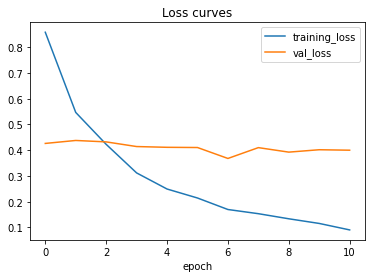

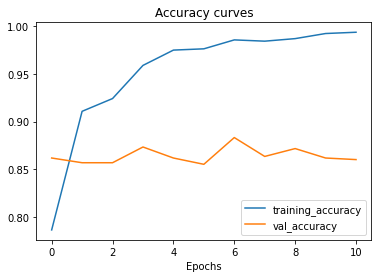

In [28]:
# Plotting loss curves
plot_loss_curves(history_fine_tuning_model_30)

There is no significant improvement between the fine-tuning of the last 20 layers and the fine-tuning of last 30 layers

### 4. Write a function to visualize an image from any dataset (train or test file) and any class (e.g. "steak", "pizza"... etc), visualize it and make a prediction on it using a trained model.

In [50]:
import numpy as np
def dataset_visualizer(dataset , model):
  '''
  Arguments: 
    dataset --> `tf.data.Dataset` object with (image , label) tuples 
    model --> the trained model 

  Returns: 
    Visualizae the image from the dataset and the prediction class of the image. 
  '''
  image_batch , label_batch = dataset.as_numpy_iterator().next() 
  batch_prob = [model.predict(tf.expand_dims(img , axis = 0)) for img in image_batch]
  batch_preds = [class_names[np.argmax(prob)] for prob in batch_prob]

  plt.figure(figsize= (10,10))
  for i in range(4):
    ax = plt.subplot(2,2,i+1)
    if class_names[np.argmax(label_batch[i])] == batch_preds[i]:
      title_color = 'g'
    else:
      title_color = 'r'
    plt.imshow(image_batch[i].astype('uint8'))
    plt.title(f"Actual: {class_names[np.argmax(label_batch[i])]}, Pred: {batch_preds[i]}, Prob: {batch_prob[i].max():.2f}" , c = title_color)
    plt.axis('off')

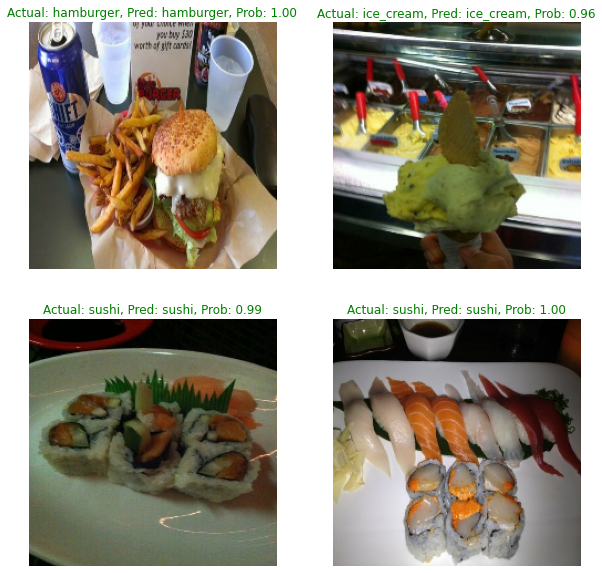

In [51]:
dataset_visualizer(test_data,model)